#En este notebook aplicaremos un algoritmo de clasificación realizando:

1.   Pre procesamiento.
2.   Entrenamiento del algoritmo
3.   Testeo del algoritmo.
4.   Cálculo de las métricas de rendimiento.



In [1]:
import numpy as np
import pandas as pd

##Información del dataset:
[AQUí](https://www.kaggle.com/shrutimechlearn/churn-modelling)

In [2]:
# Cargamos los datos
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df1 = pd.read_csv(name, sep=",")

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [44]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


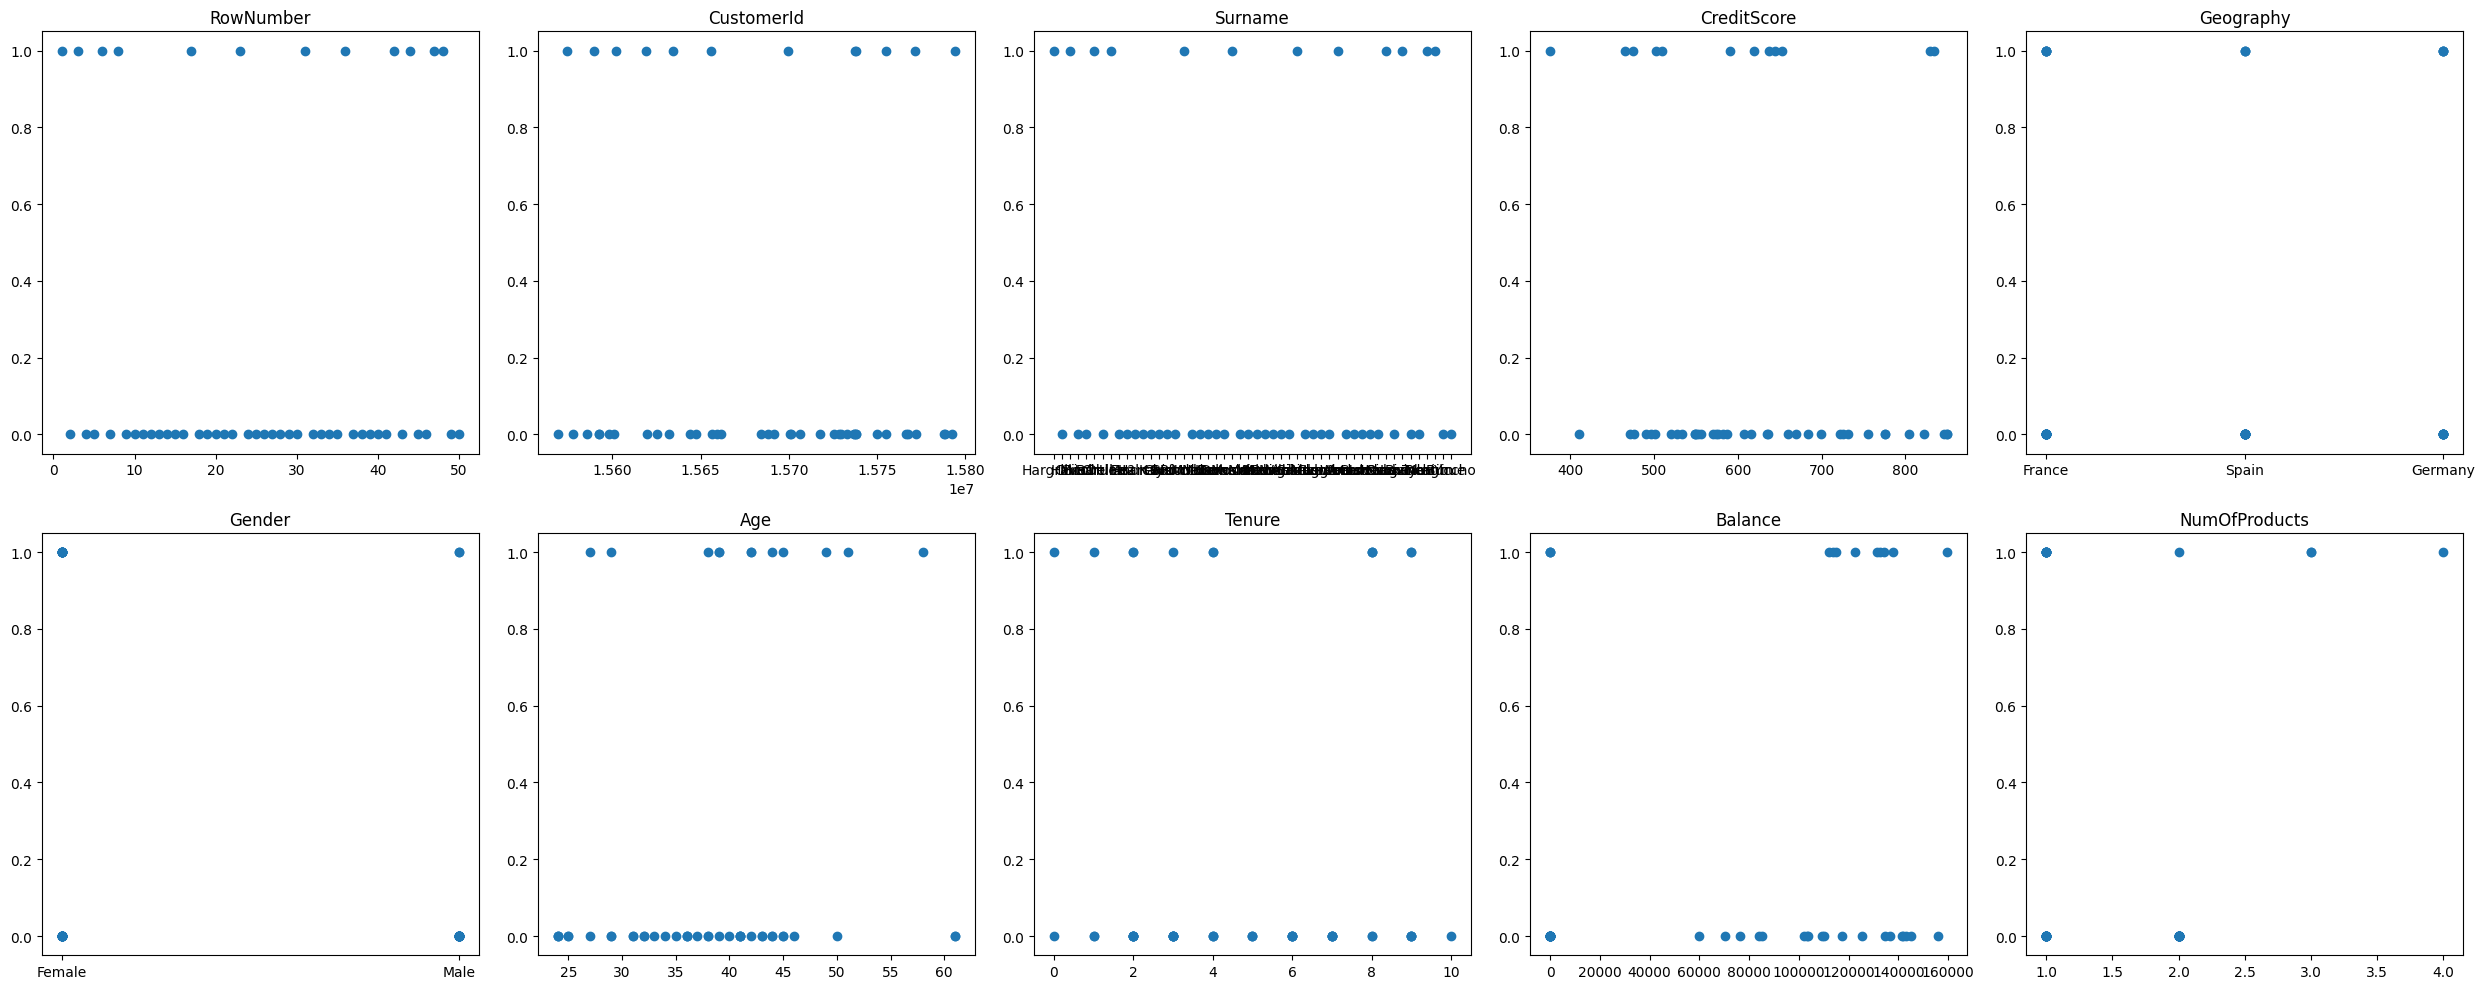

In [47]:
import matplotlib.pyplot as plt
filas = 2
col = 5

nombres_col = df1.columns

# N es la cantidad de datos con los que trabajaremos. Se usa más adelante, atención!!
N = 50
fig, axs = plt.subplots(filas, col,figsize=(25,10))

n = 0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].set_title(nombres_col[n])
        axs[i,j].scatter(df1[nombres_col[n]][:N],Y[:N])
        n = n+1

fig.tight_layout()

In [4]:
df1.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Extraemos la variable que vamos a estimar.
Y = df1['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [45]:
# Eliminamos variables que no entregan información importante.
X = df1.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
#creamos el objeto
ohe = OneHotEncoder()
# tomamos la variable a encodear
geo = np.array(X.Geography)
# la dejamos como vector fila
geo2 = geo.reshape(-1,1)
#creamos el modelo de encodeo
ohe.fit(geo2)
# aplicamos el encodeo
geo3 = ohe.transform(geo2).toarray()
geo3

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [9]:
# concatenar geo3 con X
X = pd.concat([X, pd.DataFrame(geo3)], axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [10]:
# cambiamos nombres de las variables creadas.
X.rename(columns={0: 'France', 1: 'Germany', 2:'Spain'}, inplace=True)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [11]:
X = X.drop(columns = ['Geography'])
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


Hacemos lo mismo con la variable género

Intente hacerlo usted ahora.

In [48]:
X = X.drop(columns = ['Gender'])
X

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,42,2,0.00,1,1,1,101348.88
1,608,Spain,41,1,83807.86,1,0,1,112542.58
2,502,France,42,8,159660.80,3,1,0,113931.57
3,699,France,39,1,0.00,2,0,0,93826.63
4,850,Spain,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64
9996,516,France,35,10,57369.61,1,1,1,101699.77
9997,709,France,36,7,0.00,1,0,1,42085.58
9998,772,Germany,42,3,75075.31,2,1,0,92888.52


In [12]:
ohe = OneHotEncoder()
gen = np.array(X.Gender)
gen2 = gen.reshape(-1,1)
ohe.fit(gen2)
gen3 = ohe.transform(gen2).toarray()
gen3

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [13]:
X = pd.concat([X, pd.DataFrame(gen3)], axis=1)
X.rename(columns={0: 'Female', 1: 'Male'}, inplace=True)
X = X.drop(columns = ['Gender'])
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


Ahora tenemos todas las variables numéricas. Podriamos pasar a la tarea de clasificación con el algoritmo K-NN.

## ¿Haría algo más a los datos?

In [14]:
# importamos la función que divide el train y el test
from sklearn.model_selection import train_test_split

In [15]:
# dividimos los datos entre training y testing set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=17)

In [16]:
# importamos el algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# creamos el objeto
model = KNeighborsClassifier()

In [18]:
# entrenamos el modelo
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [19]:
# realizamos predicciones de los datos de test
y_pred = model.predict(X_test)

In [20]:
# importamos las funciones que nos permiten calcular las métricas de rendimiento
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(Y_test, y_pred))

[[2235  152]
 [ 560   53]]


##¿Qué podemos decir del resultado?

In [22]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2387
           1       0.26      0.09      0.13       613

    accuracy                           0.76      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.69      0.76      0.71      3000



##¿Qué podemos decir del resultado?

##También podemos ver como le fue al algoritmo con el training set.
## Aquí calculamos las mismas métricas

In [23]:
Y_train_predicted = model.predict(X_train)

In [24]:
print(confusion_matrix(Y_train, Y_train_predicted))

[[5404  172]
 [1128  296]]


In [25]:
print(classification_report(Y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5576
           1       0.63      0.21      0.31      1424

    accuracy                           0.81      7000
   macro avg       0.73      0.59      0.60      7000
weighted avg       0.79      0.81      0.77      7000



##¿Son esperables los resultados?


Nos falta calcular al área bajo la curva (ROC AUC)

In [26]:
# importamos la función
from sklearn.metrics import roc_auc_score

In [27]:
# para el testing set
roc_auc_score(Y_test, y_pred)

0.5113908876998915

In [28]:
# para el training set
roc_auc_score(Y_train, Y_train_predicted)

0.588509341801944